<a href="https://colab.research.google.com/github/Yidan-Zhu/python_code_export/blob/main/compression_rate_on_recallphrases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import RegexpParser
from nltk.tokenize import sent_tokenize
from nltk import Tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Choose three stories of short, medium and long length for comparison and analysis of recall.

In [ ]:
#### check lengths and select stories for analysis.

def show_story_information(input_data):
    cleaned_data = {key: [str(value) for value in val] for key, val in input_data.items()}
    ### the story part.
    story = "".join(cleaned_data['narrative'])
    words = story.split()
    word_count = len(words)
    print(story)
    print("words of the story: ", word_count)
    print(" ---------------------------------- ")

    ## the recall part.
    recall = cleaned_data['recalls']
    print(recall)
    print("number of recalls: ", len(recall))
    print("      ")


# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/hester_v1-park.pkl")
# show_story_information(data)
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/hester_v2-church.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/panic.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/schissel_v1-pool.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/schissel_v2-lake.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/stein.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/triplett_v1-rookie.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/triplett_v2-catlady.pkl")
# data = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/boyscout.pkl")


## choose the three stories of short, medium and long length.
data_medium = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/hester_v2-church.pkl")
data_long = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/stein.pkl")
data_short = pd.read_pickle("E:/83. find the next lab/15. rotation in Tankut's lab/story text dataset/triplett_v1-rookie.pkl")
print("- Short Story:")
show_story_information(data_short)
print("- Medium Story:")
show_story_information(data_medium)
print("- Long Story:")
show_story_information(data_long)

cleaned_data_m = {key: [str(value) for value in val] for key, val in data_medium.items()}
cleaned_data_l = {key: [str(value) for value in val] for key, val in data_long.items()}
cleaned_data_s = {key: [str(value) for value in val] for key, val in data_short.items()}

- Short Story:
Back in the days when I was a rookie in the police force, the Chief was a veteran. He had caught a notorious criminal – or had been awarded for bravery. But he had – a young daughter. And in those days I was a fitness enthusiast. And it seemed she was trying to impress me. I never observed it. Truth is I wasn't very fond of her because she was – She was a charming girl until she opened her mouth. She was a chatterbox. Goodness, she could talk. Then she left a message one day saying she was going to run away because he was always scolding her about me. He arrived at my apartment. Big intimidating look on his face. I managed to calm him down. and proposed “Well we'll search for her and if we can't locate her well you can – do whatever you think is right.” I was strategizing. So he accepted my offer. And we went to where they found her scarf – near a park. and we traced down a little more and we couldn't locate her. And returned – it was a police station – she was sitting o

In [ ]:
##### get the data for the three stories.
def fetch_text(input_dic):
    story = "".join(input_dic['narrative'])
    recall = input_dic['recalls']
    return story, recall

story_s, recall_s = fetch_text(cleaned_data_s)
story_m, recall_m = fetch_text(cleaned_data_m)
story_l, recall_l = fetch_text(cleaned_data_l)

words = story_s.split()
word_count_s = len(words)
words = story_m.split()
word_count_m = len(words)
words = story_l.split()
word_count_l = len(words)


Preprocessing the text data.

In [ ]:
##### clean the string text data.
# manually replace shorthand with its full spelling.
shorthand_dic_s = {"we'll": 'we will',
                "wasn't": "was not",
                "can't": "can not",
                "couldn't": "could not"}

shorthand_dic_m = {"couldn't": "could not",
                    "don't": "do not",
                    "didn't": "did not",
                    "hadn't": "had not",
                    "'s": " ",      # change someone's into someone for tokenizing without losing meaning.
                    "I'm": "I am" }

shorthand_dic_l = {"that's":"that is",
                    "didn't": "did not",
                    "Don't": "do not",
                    "I'm": "I am",
                    "carryin": "carrying",   # spoken language turned into formal word.
                    "wouldn't": "would not",
                    "flyin": "flying",
                    "wa/-": "was",
                    "they're": "they are",
                    "don't": "do not",
                    "You're": "You are",
                    "can't": "can not",
                    "I'll": "I will",
                    "an'": "and",
                    "there's": "there is",
                    "/[break in the recording/]": " ",  # not story content.
                    "she's": "she is",
                    "they'd": "they would",
                    "we're": "we are"}

shorthand_recall_s = {
    "'s": " ",
    "wasn't": "was not",
    "that's": "that is",
    "hadn't": "had not",
    "couldn't": "could not",
    "wouldn't": "would not",
    "don't": "do not",
    "let's": "let us",
    "lets": "let us",
    "I'll": "I will",
    "didn't": "did not",
    "didnt": "did not"
    }

shorthand_recall_m = {
    "yr": "year",
    "&": "and",
    "yrs": "years",
    "'s": " ",
    "wasn't": "was not",
    "\n": " ",
    "didn't": "did not",
    "hadn't": "had not",
    "n't": " not"
}

shorthand_recall_l = {
    "it's": "it is",
    "'s": " ",
    "'d": " would",
    "n't": " not",
    "'ll": " will"
}

### pre-processing the text.
#stop_words =set(stopwords.words('english'))

def pre_processing_text(input_text, shorthand_replace):
    ## replace the shorthand words.
    for key, value in shorthand_replace.items():
        input_text = re.sub(key, value, input_text)
    ## tokenize the string.
    tokenized_story = sent_tokenize(input_text)
    tokenized_story = [word_tokenize(sentence) for sentence in tokenized_story]   # error to call the function here.

    cleaned_story = []
    for sentence in tokenized_story:
        ## remove non-word tokens.
        cleaned_sentence = [word for word in sentence if re.match(r'^\w+$', word)]
        ## turn the words to lower case
        cleaned_sentence = [word.lower() for word in cleaned_sentence]
        ## remove stopwords
        #filtered_sentence = [word for word in cleaned_sentence if word not in stop_words]
        cleaned_story.append(cleaned_sentence)

    return cleaned_story

story_s = pre_processing_text(story_s, shorthand_dic_s)
story_m = pre_processing_text(story_m, shorthand_dic_m)
story_l = pre_processing_text(story_l, shorthand_dic_l)

recall_s = [pre_processing_text(recall, shorthand_recall_s) for recall in recall_s]
recall_m = [pre_processing_text(recall, shorthand_recall_m) for recall in recall_m]
recall_l = [pre_processing_text(recall, shorthand_recall_l) for recall in recall_l]

Tag each word by its function in the sentence, such as noun, verb, adjective, etc. This helps identifying noun phrases and verb phrases in each sentence.

In [ ]:
### get the word type of the string.
def get_part_of_speech(input_text):
    pos_tagged_text = []
    for tok_sentence in input_text:
        pos_tagged_text.append(pos_tag(tok_sentence))
    return pos_tagged_text

tagged_s = get_part_of_speech(story_s)
tagged_m = get_part_of_speech(story_m)
tagged_l = get_part_of_speech(story_l)

tagged_recall_s = [get_part_of_speech(recall_one) for recall_one in recall_s]
tagged_recall_m = [get_part_of_speech(recall_one) for recall_one in recall_m]
tagged_recall_l = [get_part_of_speech(recall_one) for recall_one in recall_l]

Noun phrases are marked 'NP':  [Tree('NP', [('i', 'NN')]), Tree('NP', [('a', 'DT'), ('rookie', 'NN')]), Tree('NP', [('the', 'DT'), ('police', 'NN')]), Tree('NP', [('force', 'NN')]), Tree('NP', [('the', 'DT'), ('chief', 'NN')]), Tree('NP', [('a', 'DT'), ('veteran', 'NN')]), Tree('NP', [('a', 'DT'), ('notorious', 'JJ'), ('criminal', 'NN')]), Tree('NP', [('bravery', 'NN')]), Tree('NP', [('a', 'DT'), ('young', 'JJ'), ('daughter', 'NN')]), Tree('NP', [('a', 'DT'), ('fitness', 'NN')]), Tree('NP', [('enthusiast', 'NN')]), Tree('NP', [('i', 'NN')]), Tree('NP', [('truth', 'NN')]), Tree('NP', [('fond', 'NN')]), Tree('NP', [('a', 'DT'), ('charming', 'JJ'), ('girl', 'NN')]), Tree('NP', [('mouth', 'NN')]), Tree('NP', [('a', 'DT'), ('chatterbox', 'NN')]), Tree('NP', [('goodness', 'NN')]), Tree('NP', [('a', 'DT'), ('message', 'NN')]), Tree('NP', [('day', 'NN')]), Tree('NP', [('apartment', 'NN')]), Tree('NP', [('look', 'NN')]), Tree('NP', [('face', 'NN')]), Tree('NP', [('well', 'NN')]), Tree('NP', [('

In [ ]:
### find the noun phrases from each story.
def extract_subtrees(parsed_text_list, type):
    np_trees = []
    for parsed_text in parsed_text_list:  # Iterate through each Tree in the list
        for subtree in parsed_text.subtrees():
            if subtree.label() == type:  # Check if the subtree is labeled as NP
                np_trees.append(subtree)
    return np_trees

def find_noun_phrase(tagged_input):
    noun_chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(noun_chunk_grammar)
    np_chunked_oz = [chunk_parser.parse(sentence) for sentence in tagged_input]
    noun_phrases = extract_subtrees(np_chunked_oz, 'NP')
    return noun_phrases

noun_s = find_noun_phrase(tagged_s)
noun_m = find_noun_phrase(tagged_m)
noun_l = find_noun_phrase(tagged_l)

noun_recall_s = [find_noun_phrase(tagged) for tagged in tagged_recall_s]
noun_recall_m = [find_noun_phrase(tagged) for tagged in tagged_recall_m]
noun_recall_l = [find_noun_phrase(tagged) for tagged in tagged_recall_l]

print("Noun phrases are marked 'NP': ", noun_s)    # an example


### find the verb phrase from each story.
def find_verb_phrase(tagged_input):
    verb_chunk_grammar01 = "VP: {<VB.*><DT>?<JJ>*<NN><RB.?>?}"
    verb_chunk_grammar02 = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"

    chunk_parser = RegexpParser(verb_chunk_grammar01)
    vp_chunked_oz = [chunk_parser.parse(sentence) for sentence in tagged_input]
    verb_phrases01 = extract_subtrees(vp_chunked_oz, 'VP')

    chunk_parser = RegexpParser(verb_chunk_grammar02)
    vp_chunked_oz = [chunk_parser.parse(sentence) for sentence in tagged_input]
    verb_phrases02 = extract_subtrees(vp_chunked_oz, 'VP')

    return verb_phrases01, verb_phrases02

verb_s01, verb_s02 = find_verb_phrase(tagged_s)
verb_m01, verb_m02 = find_verb_phrase(tagged_m)
verb_l01, verb_l02 = find_verb_phrase(tagged_l)

verb_recall_s01, verb_recall_s02 = zip(*[find_verb_phrase(tagged) for tagged in tagged_recall_s])
verb_recall_m01, verb_recall_m02 = zip(*[find_verb_phrase(tagged) for tagged in tagged_recall_m])
verb_recall_l01, verb_recall_l02 = zip(*[find_verb_phrase(tagged) for tagged in tagged_recall_l])

print("Verb phrases are marked 'VP': ", verb_s01)    # an example


Noun phrases are marked 'NP':  [Tree('NP', [('i', 'NN')]), Tree('NP', [('a', 'DT'), ('rookie', 'NN')]), Tree('NP', [('the', 'DT'), ('police', 'NN')]), Tree('NP', [('force', 'NN')]), Tree('NP', [('the', 'DT'), ('chief', 'NN')]), Tree('NP', [('a', 'DT'), ('veteran', 'NN')]), Tree('NP', [('a', 'DT'), ('notorious', 'JJ'), ('criminal', 'NN')]), Tree('NP', [('bravery', 'NN')]), Tree('NP', [('a', 'DT'), ('young', 'JJ'), ('daughter', 'NN')]), Tree('NP', [('a', 'DT'), ('fitness', 'NN')]), Tree('NP', [('enthusiast', 'NN')]), Tree('NP', [('i', 'NN')]), Tree('NP', [('truth', 'NN')]), Tree('NP', [('fond', 'NN')]), Tree('NP', [('a', 'DT'), ('charming', 'JJ'), ('girl', 'NN')]), Tree('NP', [('mouth', 'NN')]), Tree('NP', [('a', 'DT'), ('chatterbox', 'NN')]), Tree('NP', [('goodness', 'NN')]), Tree('NP', [('a', 'DT'), ('message', 'NN')]), Tree('NP', [('day', 'NN')]), Tree('NP', [('apartment', 'NN')]), Tree('NP', [('look', 'NN')]), Tree('NP', [('face', 'NN')]), Tree('NP', [('well', 'NN')]), Tree('NP', [('

Process the Tree structure and combine the words together into a phrase.

In [ ]:
### visualize the phrases.
def clean_tree_np(input_tree):
    combined_phrase = [" ".join(word for word, tag in np.leaves()) for np in input_tree]
    unique_list = []
    [unique_list.append(item) for item in combined_phrase if item not in unique_list]
    return unique_list

def clean_tree_vp(input_tree01, input_tree02):
    combined_phrase01 = [" ".join(word for word, tag in vp.leaves()) for vp in input_tree01]
    combined_phrase02 = [" ".join(word for word, tag in vp.leaves()) for vp in input_tree02]
    combined_phrase = combined_phrase01 + combined_phrase02
    unique_list = []
    [unique_list.append(item) for item in combined_phrase if item not in unique_list]
    return unique_list

np_s = clean_tree_np(noun_s)
np_m = clean_tree_np(noun_m)
np_l = clean_tree_np(noun_l)

vb_s = clean_tree_vp(verb_s01, verb_s02)
vb_m = clean_tree_vp(verb_m01, verb_m02)
vb_l = clean_tree_vp(verb_l01, verb_l02)

np_recall_s = [clean_tree_np(recall) for recall in noun_recall_s]
np_recall_m = [clean_tree_np(recall) for recall in noun_recall_m]
np_recall_l = [clean_tree_np(recall) for recall in noun_recall_l]

vb_recall_s = [clean_tree_vp(verb01, verb02) for verb01, verb02 in zip(verb_recall_s01, verb_recall_s02)]
vb_recall_m = [clean_tree_vp(verb01, verb02) for verb01, verb02 in zip(verb_recall_m01, verb_recall_m02)]
vb_recall_l = [clean_tree_vp(verb01, verb02) for verb01, verb02 in zip(verb_recall_l01, verb_recall_l02)]

print("Noun phrases from the medium story: ", np_m)
print("Verb phrases from the medium story: ", vb_m)    # an example.


Noun phrases from the medium story:  ['share', 'a story', 'i', 'college', 'a small town', 'first job', 'a local bookstore', 'a quiet afternoon', 'the store', 'grandpa', 'a year', 'home', 'sister', 'town', 'the weekend', 'a voice', 'head', 'the old church', 'the street', 'a candle', 'the bookstore', 'no one', 'work', 'the voice', 'the same message', 'a break', 'walk', 'the church', 'a short distance', 'a moment', 'religious person', 'grandma', 'a sincere heart', 'the other hand', 'faith', 'a saint', 'family', 'front', 'the altar', 'god', 'heart', 'help', 'strength', 'care', 'prayer', 'a strong urge', 'something', 'the house', 'any voice', 'this time', 'an overwhelming feeling', 'surprise', 'the living', 'room', 'bed', 'assistance', 'a surge', 'energy', 'that day', 'the beginning', 'recovery', 'independence', 'a turning point', 'the time', 'anything', 'perspective', 'the power', 'that incident', 'ninetieth birthday', 'every moment', 'that experience', 'a vivid memory', 'mind', 'spirit', 

Compare the phrases from the original story and the recalls.

In [ ]:
### look at the phrases in the original story and the recall
np_len_s = len(np_s)
np_len_m = len(np_m)
np_len_l = len(np_l)

vb_len_s = len(vb_s)
vb_len_m = len(vb_m)
vb_len_l = len(vb_l)

np_recall_len_s = [len(np_recall) for np_recall in np_recall_s]
np_recall_len_m = [len(np_recall) for np_recall in np_recall_m]
np_recall_len_l = [len(np_recall) for np_recall in np_recall_l]

vb_recall_len_s = [len(vp_recall) for vp_recall in vb_recall_s]
vb_recall_len_m = [len(vp_recall) for vp_recall in vb_recall_m]
vb_recall_len_l = [len(vp_recall) for vp_recall in vb_recall_l]


print("Short story: ", np_s,"//////////", vb_s)
print("noun phrase: ", len(np_s), "//////// verb phrase: ", len(vb_s))
print(" ---------------------- ")
print("Short story recall: ", np_recall_s, "///////", vb_recall_s)
print("noun phrase: ", np_recall_len_s, "//////// verb phrase: ", vb_recall_len_s)
print(" ---------------------- ")
print("    ")

print("Medium story: ", np_m, "//////////", vb_m)
print("noun phrase: ", len(np_m), "//////// verb phrase: ", len(vb_m))
print(" ---------------------- ")
print("Medium story recall: ", np_recall_m, "//////////", vb_recall_m)
print("noun phrase: ", np_recall_len_m, "//////// verb phrase: ", vb_recall_len_m)
print(" ---------------------- ")
print("    ")

print("Long story: ", np_l, "//////////", vb_l)
print("noun phrase: ", len(np_l), "//////// verb phrase: ", len(vb_l))
print(" ---------------------- ")
print("Long story recall: ", np_recall_l, "//////////", vb_recall_l)
print("noun phrase: ", np_recall_len_l, "//////// verb phrase: ", vb_recall_len_l)

Short story:  ['i', 'a rookie', 'the police', 'force', 'the chief', 'a veteran', 'a notorious criminal', 'bravery', 'a young daughter', 'a fitness', 'enthusiast', 'truth', 'fond', 'a charming girl', 'mouth', 'a chatterbox', 'goodness', 'a message', 'day', 'apartment', 'look', 'face', 'well', 'offer', 'scarf', 'a park', 'a police', 'station', 'a chair', 'a book', 'the issue', 'that day', 'the deputy', 'frank', 'mitchell', 'transfer', 'that old man', 'anything', 'the end', 'rookie', 'year'] ////////// ['was a rookie', 'was a veteran', 'caught a notorious criminal', 'had a young daughter', 'was a fitness', 'was a charming girl', 'was a chatterbox', 'left a message', 'intimidating look', 'is i', 'was a police', 'resolved the issue', 'evening the deputy', 'forgets anything once', 'was the end', 'i was', 'the chief was', 'truth is', 'day saying', 'mitchell said', 'i did', 'i transferred']
noun phrase:  41 //////// verb phrase:  22
 ---------------------- 
Short story recall:  [['rookie', 'ye

Plot the number of phrases from all the recall participants.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6008\2420064640.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y="Value", data=comparison, palette=hue_colors, ax=axes[index])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6008\2420064640.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=45)  # This rotates the x-tick labels
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6008\2420064640.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y="Value", data=comparison, p

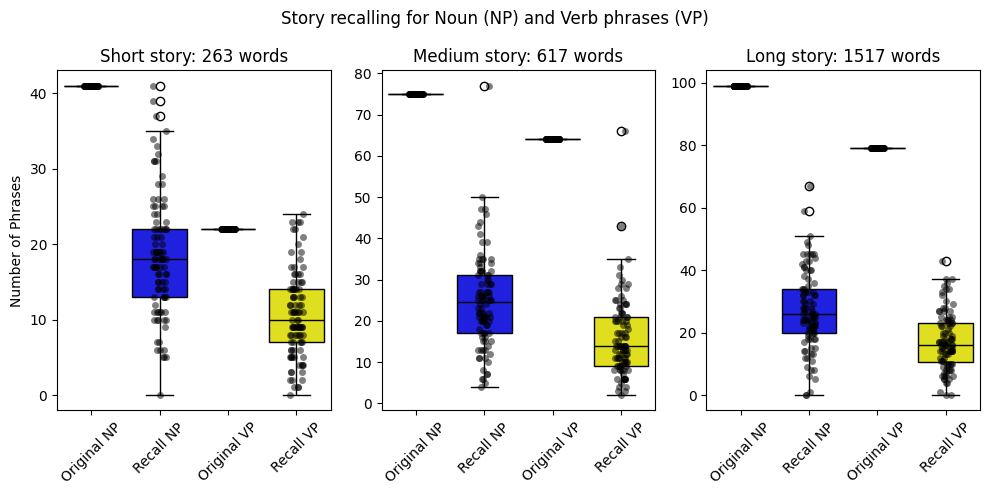

In [ ]:
### plot to compare the compression in recall for each story.
### put data into dataframe.

def process_df_len(np_len, np_recall_len, vb_len, vb_recall_len):
    comparison = [
        ["Original NP", [np_len]*len(np_recall_len)],
        ["Recall NP", np_recall_len],
        ["Original VP", [vb_len]*len(np_recall_len)],
        ["Recall VP", vb_recall_len]
    ]
    comparison = pd.DataFrame(comparison, columns=['Category', 'Value'])

    expanded_rows = []
    for index, row in comparison.iterrows():
        category = row['Category']
        for value in row['Value']:
            expanded_rows.append([category, value])

    expanded_comparison = pd.DataFrame(expanded_rows, columns=['Category', 'Value'])

    np_mean_s = np.mean(np_recall_len_s)
    vb_mean_s = np.mean(vb_recall_len_s)

    return expanded_comparison, np_mean_s, vb_mean_s

comparison_s, np_mean_s, vb_mean_s = process_df_len(np_len_s, np_recall_len_s, vb_len_s, vb_recall_len_s)
comparison_m, np_mean_m, vb_mean_m = process_df_len(np_len_m, np_recall_len_m, vb_len_m, vb_recall_len_m)
comparison_l, np_mean_l, vb_mean_l = process_df_len(np_len_l, np_recall_len_l, vb_len_l, vb_recall_len_l)

### plot.
def plot_each_story(comparison, index):
    hue_colors = {
    "Recall NP": "blue",
    "Recall VP": "yellow",
    "Original NP": "black",
    "Original VP": "black"
}
    sns.boxplot(x='Category', y="Value", data=comparison, palette=hue_colors, ax=axes[index])
    sns.stripplot(x='Category', y="Value", data=comparison, color='black', jitter=True, alpha=0.5, ax=axes[index])
    if (index == 0):
        axes[index].set_ylabel("Number of Phrases")
    else:
        axes[index].set_ylabel("")
    axes[index].set_xlabel("")
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=45)  # This rotates the x-tick labels

    if index == 0:
        axes[index].set_title(f"Short story: {word_count_s} words")
    elif index == 1:
        axes[index].set_title(f"Medium story: {word_count_m} words")
    else:
        axes[index].set_title(f"Long story: {word_count_l} words")


fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plt.suptitle("Story recalling for Noun (NP) and Verb phrases (VP)")
plot_each_story(comparison_s, 0)
plot_each_story(comparison_m, 1)
plot_each_story(comparison_l, 2)

plt.tight_layout()
plt.show()


Calculate the (recall phrase / original) compression rate. Just use the average recall phrase number here, and the individual distribution is similiar with the boxplot above.

Compression rate for noun phrases in short stories:  0.45
Compression rate for verb phrases in short stories:  0.48
Compression rate for noun phrases in medium stories:  0.25
Compression rate for verb phrases in medium stories:  0.17
Compression rate for noun phrases in long stories:  0.19
Compression rate for verb phrases in long stories:  0.13


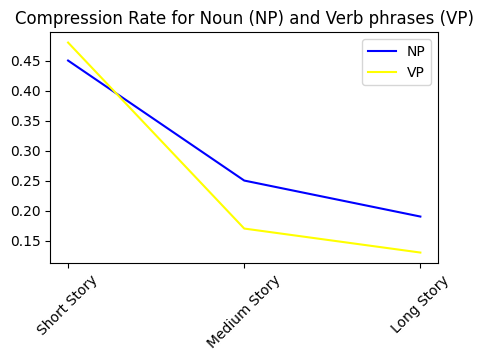

In [ ]:
### show the compression rate.
def compression_rate(np_mean, np_len, vb_mean, vb_len, type):
    compression_np = round(np_mean / np_len, 2)
    compression_vb = round(vb_mean / vb_len, 2)
    print("Compression rate for noun phrases in", type, "stories: ", compression_np)
    print("Compression rate for verb phrases in", type, "stories: ", compression_vb)
    return compression_np, compression_vb

np_s, vb_s = compression_rate(np_mean_s, np_len_s, vb_mean_s, vb_len_s, "short")
np_m, vb_m = compression_rate(np_mean_m, np_len_m, vb_mean_m, vb_len_m, "medium")
np_l, vb_l = compression_rate(np_mean_l, np_len_l, vb_mean_l, vb_len_l, "long")

x=np.arange(1, 4)
y1=[np_s, np_m, np_l]
y2= [vb_s, vb_m, vb_l]

### plot the compression of all the participants.
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
plt.title("Compression Rate for Noun (NP) and Verb phrases (VP)")
plt.plot(x, y1, color = "blue", label="NP")
plt.plot(x, y2, color = "yellow", label="VP")
plt.xticks(ticks=x, labels=["Short Story", "Medium Story", "Long Story"])
plt.xticks(rotation = 45)
plt.legend()
plt.show()

The recall phrase number decreases greatly from the short to medium story, with 45% to 25% noun phrase recall and 47% to 16% verb phrase recall. Then, the rate decreases with a smaller rate from the medium to long story, with 25% to 20% noun phrase recall and 16% to 13% verb phrase recall.

The noun phrase recall rate (around 20-25%) is higher than the verb phrase recall rate (around 16-13%) as the story becomes longer.

Find which phrases in the original story is recalled by the participants. Look at the cosine similiarity distance between the original story and the recall.

In [ ]:





#Tree.fromstring(str(chunked)).pretty_print() # show up in a tree structure.